In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from pathlib import Path
import itertools


In [2]:
n_results = 6
save_dir = 'plots'
colors = plt.cm.rainbow(np.linspace(0, 1, n_results))


In [3]:
def zero_cross(a):
    return np.where(np.diff(np.sign(a)))[1]


def read_clmn_in_file(fpath):
    df = pd.read_csv(fpath, sep=',', skiprows=0, comment='#', header=None)
    all_data = df.to_numpy(dtype='float')
    return all_data[:, 0]


def get_axes_s11():
    plt.rcParams.update(
        {'font.size': 18, 'lines.markersize': 0, 'lines.linewidth': 2,
         'axes.grid': True, 'lines.marker': '.',
         'axes.autolimit_mode': 'round_numbers',
        #  'axes.prop_cycle': plt.cycler(color=colors),
         'figure.max_open_warning': 0})
    fig, ax2 = plt.subplots(nrows=1, ncols=1, figsize=(12, 10))
    # for idx in R.idxCross:
    #     ax2.axvline(R.fRange[idx]*1e-9, lw=2, linestyle='--',
    #                 color='#292d3e')
    ax2.set_title('S$_{11}$', weight='bold')
    ax2.set_xlabel('Frequency (GHz)')
    ax2.set_ylabel('Magnitude (dB)')
    # ax2.set_ylim(None, 0)
    return fig, ax2


def save_fig_s11(fig, fname='s11_.png', save_dir=save_dir):
    s11pngPath = Path(save_dir, fname)
    save_dir = Path(save_dir)
    save_dir.mkdir(parents=True, exist_ok=True)

    fig.savefig(s11pngPath, bbox_inches='tight')


In [4]:
class Result:
    id_obj = itertools.count()

    def __init__(self, dir_ ,
                 optType, obj, z0, idx,
                 save_dir=save_dir):
        self.id      = next(Result.id_obj)
        self.dir_    = dir_
        self.optType = optType
        self.z0      = z0

        self.c       = colors[self.id]
        self.label   = f"{optType}{obj} {z0}{idx}"
        
        self.fRange  = self.load_data('freqRange.csv')
        self.ImZ     = self.load_data('ImZ.csv')
        self.ReZ     = self.load_data('ReZ.csv')
        self.s11db   = self.load_data('S11db.csv')

        self.save_dir = save_dir
        # print(self.id)
                    
        
    def load_data(self, fname):
        subDir = 'data'
        fpath = Path(self.dir_, subDir, fname)
        return read_clmn_in_file(fpath)


In [5]:
mlabBT_50     = Result('mlab_BT_def_50',   'mlab', 'BT',   50,   ''  )
gpBT_50_1     = Result('gp_BT_cstm_50_i1', 'gp',   'BT',   50,   '_1')
gpBT_50_2     = Result('gp_BT_cstm_50_i2', 'gp',   'BT',   50,   '_2')
gpBT_1000     = Result('gp_BT_cstm_1000',  'gp',   'BT',   1000, ''  )
AnPoly_1000_0 = Result('An_poly_1000_i0',  'An',   'Poly', 1000, '_0')
AnPoly_1000   = Result('An_poly_1000',     'An',   'Poly', 1000, ''  )

gpVSmlab_50_list = [
                    mlabBT_50,
                    gpBT_50_1,
                    gpBT_50_2,
                    ]
 
gpVSAn_1000 = [
               gpBT_1000,
               AnPoly_1000_0,
               AnPoly_1000,
               ]


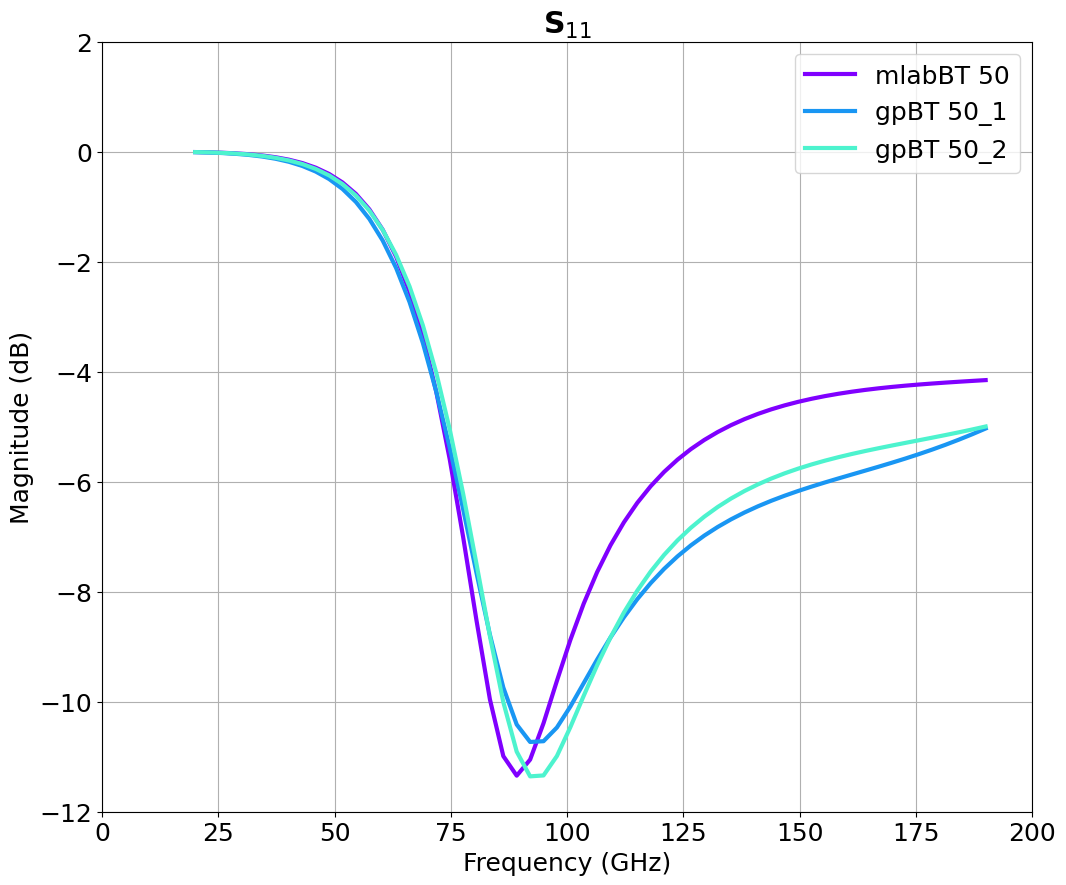

In [6]:
fig, ax = get_axes_s11()
for R in gpVSmlab_50_list:
    ax.plot(R.fRange*1e-9, R.s11db, lw=3, label=R.label, c=R.c)
ax.legend()

save_fig_s11(fig, fname='s11_gpVSmlab_50.png')


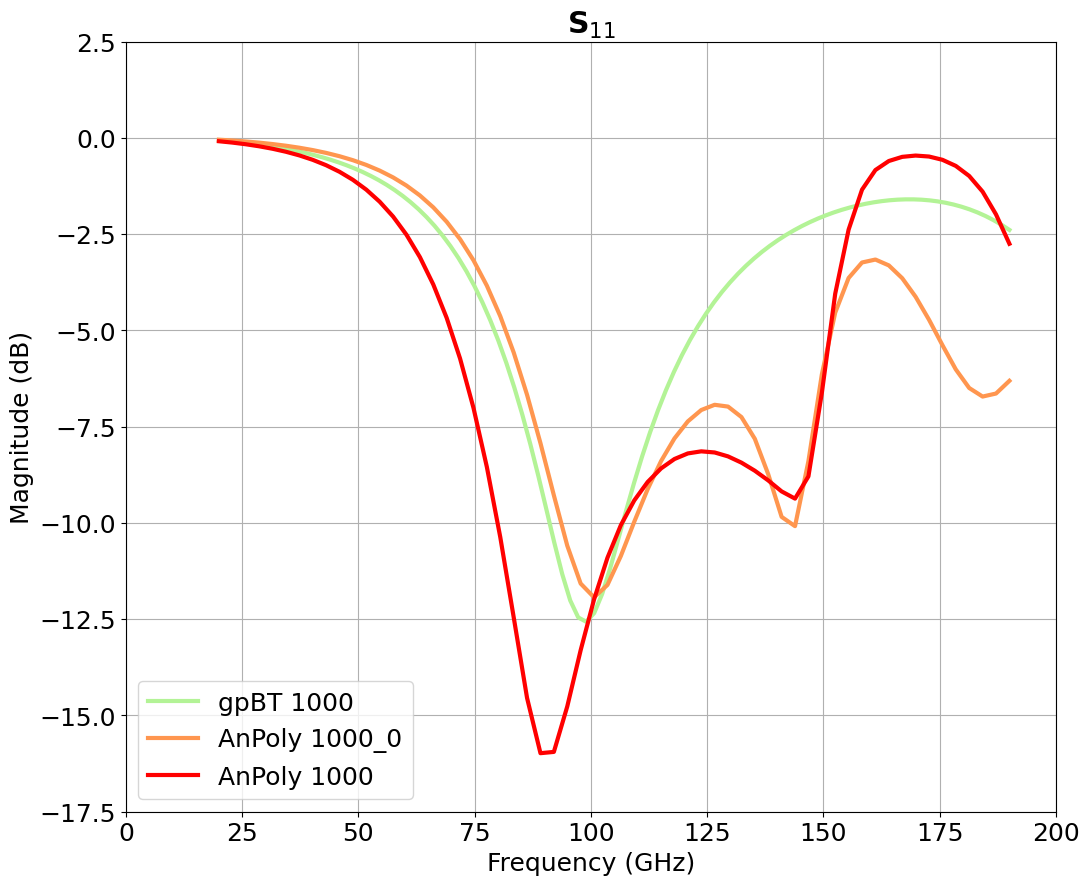

In [7]:
fig, ax = get_axes_s11()
for R in gpVSAn_1000:
    ax.plot(R.fRange*1e-9, R.s11db, lw=3, label=R.label, c=R.c)
ax.legend()

save_fig_s11(fig, fname='s11_gpVSAn_1000.png')


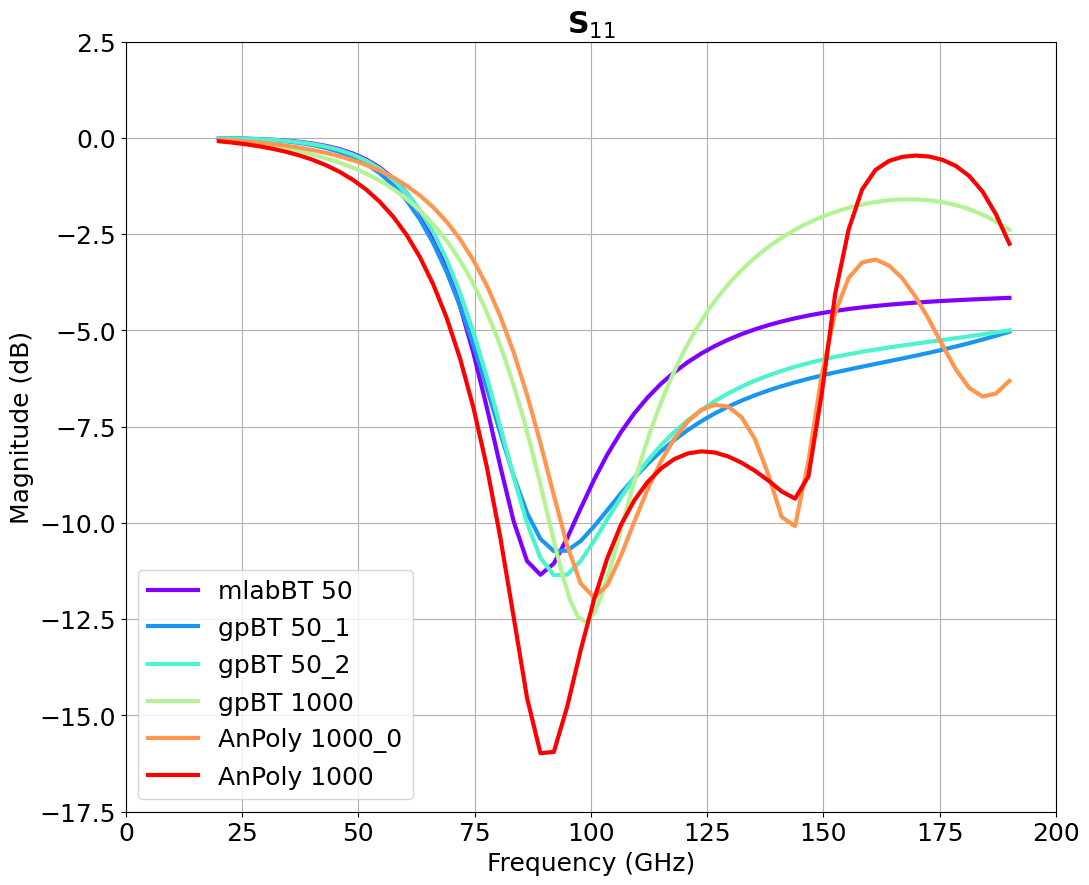

In [8]:
All = gpVSmlab_50_list + gpVSAn_1000
fig, ax = get_axes_s11()
for R in All:
    ax.plot(R.fRange*1e-9, R.s11db, lw=3, label=R.label, c=R.c)
ax.legend()

save_fig_s11(fig, fname='s11_All.png')
